# last_promo

In [2]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# file = r'C:\Users\Utilizador\Desktop\NOVA IMS\1º semestre\Data Mining\projeto\DM2425_ABCDEats_DATASET.csv'
# df = pd.read_csv(file)

# #pd.set_option('display.max_rows', None)  # Mostrar todas as linhas

In [2]:
#Criar 'order_count'= somatório das colunas dow_0 a dow_6
df['order_count'] = df[[f'DOW_{i}' for i in range(7)]].sum(axis=1)

#Criar 'price_per_order' dividindo a soma das colunas CUI_* pelo 'order_count'
culinarias = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 
              'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
              'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 
              'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
              'CUI_Thai']

# Somar o gasto total em culinária e dividir pelo número de pedidos ('order_count')
df['price_per_order'] = df[culinarias].sum(axis=1) / df['order_count']

# Filtrar o DataFrame para remover linhas onde order_count é 0
df_filtered = df[df['order_count'] > 0].copy()

# Calcular quantas observações foram perdidas
observacoes_perdidas = len(df) - len(df_filtered)

# Exibir os resultados
print(f"Número total de observações: {len(df)}")
print(f"Número de observações após filtro: {len(df_filtered)}")
print(f"Número de observações perdidas: {observacoes_perdidas}")

Número total de observações: 31888
Número de observações após filtro: 31750
Número de observações perdidas: 138


In [3]:
#1.
#Unique values e freq absoluta
unique_values = df['last_promo'].value_counts()
print("Frequências absolutas:")
print(unique_values)

#moda
moda_value = df['last_promo'].mode()[0]
print(f"Moda: {moda_value}")

# Freq relativa
relative_values = df['last_promo'].value_counts(normalize=True)
print("\nFrequências relativas (%):")
print(relative_values * 100)

Frequências absolutas:
-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: last_promo, dtype: int64
Moda: -

Frequências relativas (%):
-           52.521325
DELIVERY    19.712745
DISCOUNT    14.099348
FREEBIE     13.666583
Name: last_promo, dtype: float64


#### Gráfico de Barras - Média de order_count por last_promo

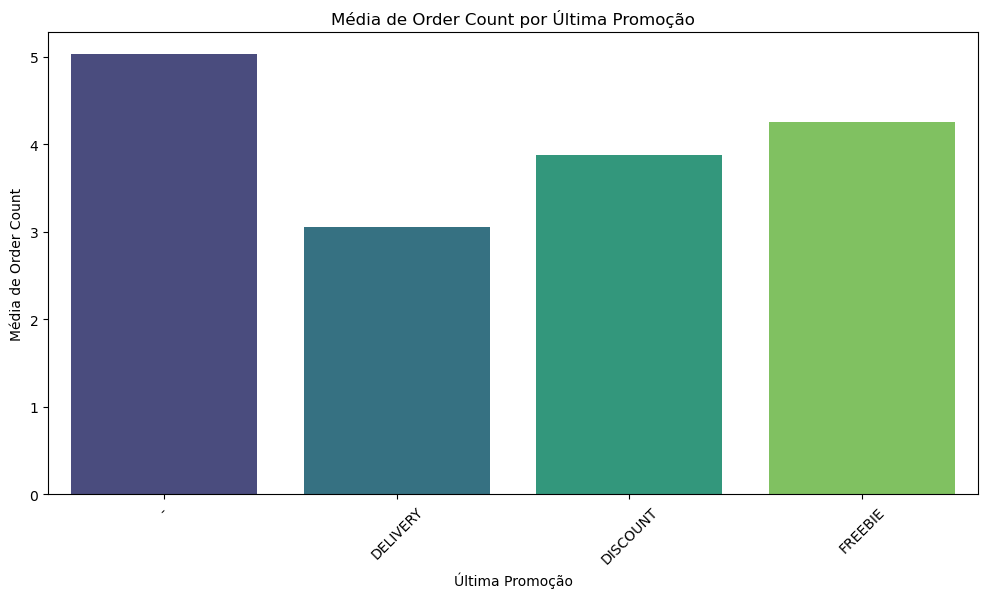

In [4]:
plt.figure(figsize=(12, 6))
mean_order_count = df.groupby('last_promo')['order_count'].mean()
sns.barplot(x=mean_order_count.index, y=mean_order_count.values, palette='viridis')
plt.title('Média de Order Count por Última Promoção')
plt.xlabel('Última Promoção')
plt.ylabel('Média de Order Count')
plt.xticks(rotation=45)
plt.show()

#### Gráfico de Barras - Soma de CUI_* por last_promo

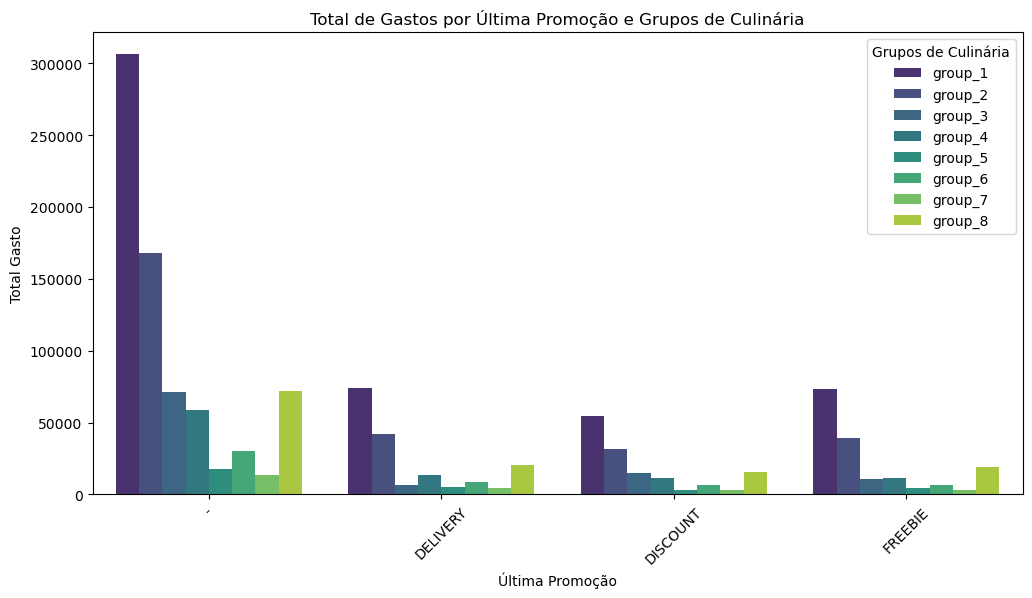

In [6]:
# Criar as colunas agrupadas
df['group_1'] = df[['CUI_Asian', 'CUI_Japanese', 'CUI_Chinese', 'CUI_Thai', 'CUI_Noodle Dishes']].sum(axis=1)
df['group_2'] = df[['CUI_American', 'CUI_Street Food / Snacks']].sum(axis=1)
df['group_3'] = df['CUI_Italian']
df['group_4'] = df['CUI_OTHER']
df['group_5'] = df['CUI_Healthy']
df['group_6'] = df['CUI_Indian']
df['group_7'] = df['CUI_Chicken Dishes']
df['group_8'] = df[['CUI_Beverages', 'CUI_Desserts', 'CUI_Cafe']].sum(axis=1)

# Selecionar as novas colunas agrupadas
group_columns = ['group_1', 'group_2', 'group_3', 'group_4', 'group_5', 'group_6', 'group_7', 'group_8']

# Calcular a soma das colunas agrupadas por 'last_promo'
grouped_spending = df.groupby('last_promo')[group_columns].sum().reset_index()

# Transformar o dataframe para formato long para visualização com seaborn
grouped_spending_long = grouped_spending.melt(id_vars='last_promo', var_name='Group', value_name='Total Spent')

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_spending_long, x='last_promo', y='Total Spent', hue='Group', palette='viridis')
plt.title('Total de Gastos por Última Promoção e Grupos de Culinária')
plt.xlabel('Última Promoção')
plt.ylabel('Total Gasto')
plt.xticks(rotation=45)
plt.legend(title='Grupos de Culinária', loc='upper right')
plt.show()

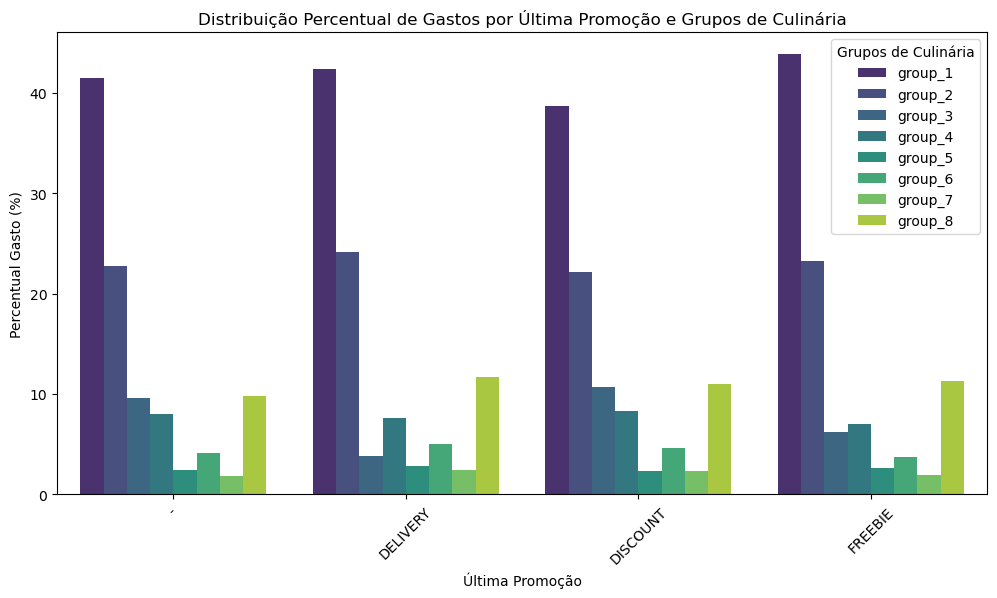

In [8]:
# Criar as colunas agrupadas
df['group_1'] = df[['CUI_Asian', 'CUI_Japanese', 'CUI_Chinese', 'CUI_Thai', 'CUI_Noodle Dishes']].sum(axis=1)
df['group_2'] = df[['CUI_American', 'CUI_Street Food / Snacks']].sum(axis=1)
df['group_3'] = df['CUI_Italian']
df['group_4'] = df['CUI_OTHER']
df['group_5'] = df['CUI_Healthy']
df['group_6'] = df['CUI_Indian']
df['group_7'] = df['CUI_Chicken Dishes']
df['group_8'] = df[['CUI_Beverages', 'CUI_Desserts', 'CUI_Cafe']].sum(axis=1)

# Selecionar as novas colunas agrupadas
group_columns = ['group_1', 'group_2', 'group_3', 'group_4', 'group_5', 'group_6', 'group_7', 'group_8']

# Calcular a soma das colunas agrupadas por 'last_promo'
grouped_spending = df.groupby('last_promo')[group_columns].sum()

# Calcular os percentuais dentro de cada 'last_promo'
grouped_spending_percentage = grouped_spending.div(grouped_spending.sum(axis=1), axis=0) * 100

# Transformar o dataframe para formato long para visualização com seaborn
grouped_spending_percentage_long = grouped_spending_percentage.reset_index().melt(id_vars='last_promo', 
                                                                                  var_name='Group', 
                                                                                  value_name='Percentage')

# Plotar o gráfico de barras empilhadas (percentual)
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_spending_percentage_long, x='last_promo', y='Percentage', hue='Group', palette='viridis')
plt.title('Distribuição Percentual de Gastos por Última Promoção e Grupos de Culinária')
plt.xlabel('Última Promoção')
plt.ylabel('Percentual Gasto (%)')
plt.xticks(rotation=45)
plt.legend(title='Grupos de Culinária', loc='upper right')
plt.show()

In [7]:
import scipy.stats as stats

# Executar ANOVA
anova_result = stats.f_oneway(*[df[df['last_promo'] == promo]['order_count'] for promo in df['last_promo'].unique()])
print(f"Resultado do teste ANOVA: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

Resultado do teste ANOVA: F-statistic = 253.54595731997887, p-value = 1.2793130981107255e-162


F-statistic: A estatística F compara a variação entre os grupos com a variação dentro dos grupos. Um valor F maior sugere que as diferenças entre os grupos são mais significativas em comparação com as variações internas dos grupos. Neste caso, o valor F é 253.55, o que é bastante elevado, sugerindo que há uma diferença significativa entre os grupos de last_promo em termos de order_count.

p-value: O valor-p indica a probabilidade de que as diferenças observadas entre os grupos sejam devidas ao acaso. Um p-value baixo (geralmente menor que 0.05) indica que há evidência suficiente para rejeitar a hipótese nula (de que não há diferença significativa entre as médias dos grupos). Aqui, o p-value é extremamente baixo (1.28e-162), o que significa que as diferenças entre os grupos de last_promo em relação a order_count são altamente significativas e é muito improvável que tenham ocorrido por acaso.